In [1]:
from tsai.all import *
import sklearn.metrics as skm

from IPython.display import clear_output
computer_setup()

os              : Windows-10-10.0.22621-SP0
python          : 3.8.15
tsai            : 0.3.4
fastai          : 2.7.10
fastcore        : 1.5.27
torch           : 1.9.1+cu111
device          : 1 gpu (['NVIDIA GeForce RTX 2070 SUPER'])
cpu cores       : 8
threads per cpu : 2
RAM             : 31.92 GB
GPU memory      : [8.0] GB


### Resteaze Data

In [2]:
# # Read the two csv files as one
# df1 = pd.read_csv('final_processed.csv')
# df2 = pd.read_csv('final_test_processed.csv')
# data = pd.concat([df1, df2], ignore_index=True)

# data.tail()

# Read the data
data = pd.read_csv('final_processed.csv', index_col=0)

data.tail()

,level_0,index,unixTimes,accelerometerX,accelerometerY,accelerometerZ,gyroscopeX,gyroscopeY,gyroscopeZ,ledGreen,...,sdsd,rmssd,pnn20,pnn50,hr_mad,sd1,sd2,s,sd1/sd2,breathingrate
9181496,18362992,1310204.5,1.648124e+12,-2192.50,159.75,3402.00,14.25,-199.25,61.50,-38.178333,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9181497,18362994,1310206.5,1.648124e+12,-2194.00,163.75,3395.50,19.75,-201.00,57.75,-29.258338,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9181498,18362996,1310208.5,1.648124e+12,-2193.75,167.00,3394.75,17.00,-222.25,58.00,-18.186857,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9181499,18362998,1310210.5,1.648124e+12,-2192.00,161.50,3398.00,22.75,-246.75,54.00,-7.657366,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9181500,18363000,1310212.5,1.648124e+12,-2187.25,163.00,3402.00,25.00,-237.25,58.50,0.566843,...,134.366369,222.843576,0.888889,0.777778,80.0,157.351188,119.835278,59238.572803,1.313062,0.20436


In [3]:
df = data.copy()

df = df[df.sleep_state != -1]

# Binary Classification
df["sleep_state"] = np.where(df["sleep_state"] == 0, 0, 1)

# fill NaN values
df = df.fillna(method='bfill', limit=1500).dropna()

# # set column time as datetime index
# df['time'] = pd.to_datetime(df['time'])
# df = df.set_index('time', drop=True)

df = df[['ledGreen', 'bpm', 'rmssd', 'pnn20', 'pnn50', 'hr_mad', 'sd1', 'sd2', 'accelerometerX', 'accelerometerY', 'accelerometerZ', 'gyroscopeX', 'gyroscopeY', 'gyroscopeZ', 'sleep_state']]


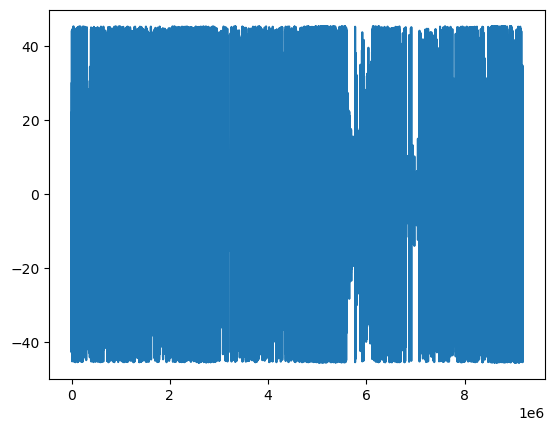

In [4]:
# df = ((df + df.shift(-1)) / 2)[::2]

# remove extreme values from the signal (outliers)


def remove_extreme_values(signal, threshold):
    # Compute the absolute difference between the signal and its mean
    absolute_difference = np.abs(signal - np.mean(signal))
    # Compute the median of the absolute difference
    median_absolute_difference = np.median(absolute_difference)
    # Compute the median absolute deviation
    median_absolute_deviation = 1.4826 * median_absolute_difference
    # Compute the z-score
    z_score = 0.6745 * (absolute_difference / median_absolute_deviation)
    # Remove the extreme values
    signal = signal[z_score < threshold]
    return signal


# Example usage
filtered_ppg = remove_extreme_values(df['ledGreen'], threshold=3.0)
filtered_bpm = remove_extreme_values(df['bpm'], threshold=3.0)
filtered_rmssd = remove_extreme_values(df['rmssd'], threshold=3.0)
filtered_pnn20 = remove_extreme_values(df['pnn20'], threshold=3.0)
filtered_pnn50 = remove_extreme_values(df['pnn50'], threshold=3.0)
filtered_hr_mad = remove_extreme_values(df['hr_mad'], threshold=3.0)
filtered_sd1 = remove_extreme_values(df['sd1'], threshold=3.0)
filtered_sd2 = remove_extreme_values(df['sd2'], threshold=3.0)
filtered_accelerometerX = remove_extreme_values(df['accelerometerX'], threshold=3.0)
filtered_accelerometerY = remove_extreme_values(df['accelerometerY'], threshold=3.0)
filtered_accelerometerZ = remove_extreme_values(df['accelerometerZ'], threshold=3.0)
filtered_gyroscopeX = remove_extreme_values(df['gyroscopeX'], threshold=3.0)
filtered_gyroscopeY = remove_extreme_values(df['gyroscopeY'], threshold=3.0)
filtered_gyroscopeZ = remove_extreme_values(df['gyroscopeZ'], threshold=3.0)


df['ledGreen'] = filtered_ppg
df['bpm'] = filtered_bpm
df['rmssd'] = filtered_rmssd
df['pnn20'] = filtered_pnn20
df['pnn50'] = filtered_pnn50
df['hr_mad'] = filtered_hr_mad
df['sd1'] = filtered_sd1
df['sd2'] = filtered_sd2
df['accelerometerX'] = filtered_accelerometerX
df['accelerometerY'] = filtered_accelerometerY
df['accelerometerZ'] = filtered_accelerometerZ
df['gyroscopeX'] = filtered_gyroscopeX
df['gyroscopeY'] = filtered_gyroscopeY
df['gyroscopeZ'] = filtered_gyroscopeZ

df = df.dropna()

plt.plot(filtered_ppg)

In [5]:
# Non null values in the dataset
df.isnull().sum()

ledGreen          0
bpm               0
rmssd             0
pnn20             0
pnn50             0
hr_mad            0
sd1               0
sd2               0
accelerometerX    0
accelerometerY    0
accelerometerZ    0
gyroscopeX        0
gyroscopeY        0
gyroscopeZ        0
sleep_state       0
dtype: int64

In [6]:
class_map = {
    0: 'WK',  # wake
    1: 'SL',  # sleep
}
class_map

{0: 'WK', 1: 'SL'}

<AxesSubplot:>

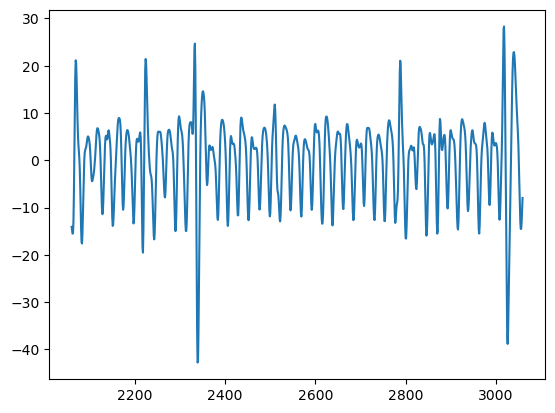

In [7]:
df['ledGreen'][2000:3000].plot()

# Filters and transforms

## TSData preparation

## Data from 3d array

In [8]:
from sklearn.preprocessing import MinMaxScaler, RobustScaler, LabelEncoder


scaler = MinMaxScaler()
le = LabelEncoder()

temp_df = df[['ledGreen', 'bpm', 'rmssd', 'pnn20', 'pnn50', 'hr_mad', 'sd1', 'sd2', 'accelerometerX', 'accelerometerY', 'accelerometerZ', 'gyroscopeX', 'gyroscopeY', 'gyroscopeZ', 'sleep_state']]
X = scaler.fit_transform(temp_df.drop('sleep_state', axis=1))
y = le.fit_transform(temp_df['sleep_state'])

# selecting sequences range
X = X[0:(len(X) - len(X) % 1500)]
y = y[0:(len(y) - len(y) % 1500)]

# reshape the data to tsai format
X = X.reshape(-1, 1500, 14)
X = X.transpose(0, 2, 1)
y = y.reshape(-1, 1500)
y = (y.sum(axis=1) // 1500).reshape(-1, 1).flatten()

print(X.shape, y.shape)

pd.DataFrame(X[0])

(4130, 14, 1500) (4130,)


,0,1,2,3,4,5,6,7,8,9,...,1490,1491,1492,1493,1494,1495,1496,1497,1498,1499
0,0.984450,0.031240,0.847334,0.729864,0.432728,0.159212,0.042000,0.136080,0.226122,0.305554,...,0.499581,0.467578,0.440144,0.419439,0.407899,0.406736,0.415001,0.430621,0.451709,0.475973
1,0.286834,0.286834,0.286834,0.286834,0.286834,0.286834,0.286834,0.286834,0.286834,0.286834,...,0.364755,0.364755,0.364755,0.364755,0.364755,0.364755,0.364755,0.364755,0.364755,0.364755
2,0.300519,0.300519,0.300519,0.300519,0.300519,0.300519,0.300519,0.300519,0.300519,0.300519,...,0.513431,0.513431,0.513431,0.513431,0.513431,0.513431,0.513431,0.513431,0.513431,0.513431
3,0.843137,0.843137,0.843137,0.843137,0.843137,0.843137,0.843137,0.843137,0.843137,0.843137,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
4,0.823529,0.823529,0.823529,0.823529,0.823529,0.823529,0.823529,0.823529,0.823529,0.823529,...,0.857143,0.857143,0.857143,0.857143,0.857143,0.857143,0.857143,0.857143,0.857143,0.857143
5,0.400000,0.400000,0.400000,0.400000,0.400000,0.400000,0.400000,0.400000,0.400000,0.400000,...,0.400000,0.400000,0.400000,0.400000,0.400000,0.400000,0.400000,0.400000,0.400000,0.400000
6,0.345889,0.345889,0.345889,0.345889,0.345889,0.345889,0.345889,0.345889,0.345889,0.345889,...,0.546770,0.546770,0.546770,0.546770,0.546770,0.546770,0.546770,0.546770,0.546770,0.546770
7,0.532308,0.532308,0.532308,0.532308,0.532308,0.532308,0.532308,0.532308,0.532308,0.532308,...,0.441301,0.441301,0.441301,0.441301,0.441301,0.441301,0.441301,0.441301,0.441301,0.441301
8,0.486979,0.485210,0.486631,0.485239,0.485558,0.485674,0.483122,0.485993,0.486834,0.484746,...,0.485326,0.486312,0.485036,0.484195,0.484398,0.484862,0.487066,0.485326,0.484601,0.484659
9,0.561959,0.566312,0.564651,0.565011,0.565639,0.564068,0.565459,0.564831,0.561869,0.561824,...,0.563933,0.564113,0.562318,0.561016,0.561330,0.565100,0.563260,0.561555,0.562363,0.563215


In [9]:
# # Reverser X & y

# X = np.flip(X)
# y = np.flip(y)

# print(X.shape, y.shape)

In [10]:
# sht = len(X) // 1500
# print("Shape: ", sht)

# X = X.T.reshape(sht, 8, 1500)
# y = y.T.reshape(sht, 1500)
# y = (y.sum(axis=1) // 1500).reshape(-1, 1).flatten()

# X.shape, y.shape

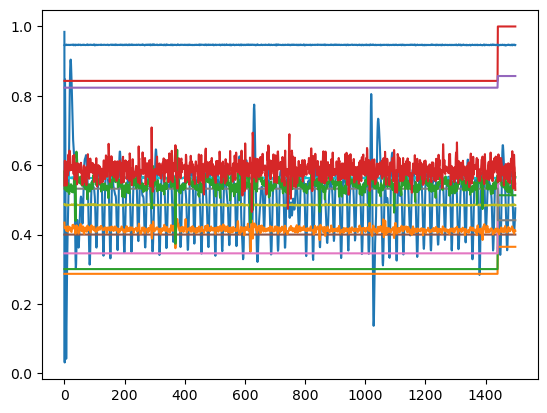

In [11]:
# plot the first 2 sequences
plt.plot(X[0].T)

In [12]:
labeler = ReLabeler(class_map)
new_y = labeler(y) # map to more descriptive labels

X.shape, new_y.shape

((4130, 14, 1500), (4130,))

In [13]:
label_counts = collections.Counter(new_y)
print('Counts by label:', dict(label_counts))
print(f'Naive Accuracy: {100*max(label_counts.values())/sum(label_counts.values()):0.2f}%')

Counts by label: {'WK': 1346, 'SL': 2784}
Naive Accuracy: 67.41%


## Dataloaders

In [14]:
# metrics = [accuracy, Precision(), Recall(), F1Score()]

# model = build_ts_model(InceptionTimePlus, dls=dls, **{'fc_dropout' : 0.5})
# # model = build_ts_model(InceptionTimePlus, dls=dls)

# learn = ts_learner(dls, model, metrics=metrics, cbs=ShowGraph())

In [15]:
# splits = get_splits(new_y,
#                     n_splits=15,
#                     test_size=0.0625,
#                     shuffle=False,
#                     stratify=True,
#                     check_splits=True)

In [16]:
# X_test, y_test = X[splits[0][2]], y[splits[0][2]]
# X_test.shape, y_test.shape

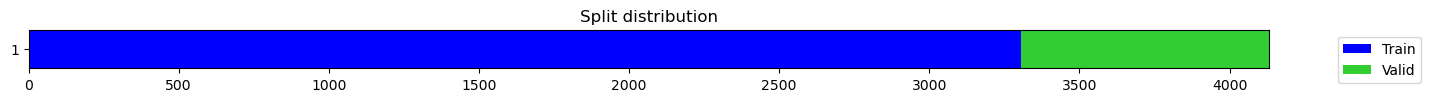

In [17]:
from sklearn.linear_model import RidgeClassifierCV

metrics = [accuracy, Precision(), Recall(), F1Score()]

splits = get_splits(y,
                    n_splits=1,
                    # test_size=0.0625,
                    shuffle=False,
                    stratify=True,
                    check_splits=True)


tfms = [None, [Categorize()]]
dsets = TSDatasets(X, y, tfms=tfms, splits=splits, inplace=True)
dls = TSDataLoaders.from_dsets(dsets.train,
                                dsets.valid,
                                bs=[64, 128],
                                batch_tfms=[TSStandardize(by_sample=True)],
                                num_workers=0,
                                drop_last=False,
                                shuffle_train=False)
                                
model = build_ts_model(ROCKET, dls=dls)

# create rocket features
X_train, y_train = create_rocket_features(dls.train, model)
X_valid, y_valid = create_rocket_features(dls.valid, model)

In [18]:
# train ridge classifier
ridge = RidgeClassifierCV(alphas=np.logspace(-8, 8, 17), normalize=True)
ridge.fit(X_train, y_train)

print(
    f'alpha: {ridge.alpha_:.2E}  train: {ridge.score(X_train, y_train):.5f}  valid: {ridge.score(X_valid, y_valid):.5f}'
)


alpha: 1.00E-01  train: 0.99576  valid: 0.69492


##### Save model

In [19]:
# learn.save('all_features')

In [20]:
# learn.save_all(path='export_all',
#                dls_fname='dls',
#                model_fname='model',
#                learner_fname='learner')

## Inferece on unseen data


In [21]:
# Read the data
test_data = pd.read_csv('final_test_processed.csv', index_col=0)

test_data = test_data[test_data.sleep_state != -1]

# Binary Classification
test_data["sleep_state"] = np.where(test_data["sleep_state"] == 0, 0, 1)

# fill NaN values
test_data = test_data.fillna(method='bfill', limit=1500).dropna()

# # set column time as datetime index
# df['time'] = pd.to_datetime(df['time'])
# df = df.set_index('time', drop=True)

test_data = test_data[['ledGreen', 'bpm', 'rmssd', 'pnn20', 'pnn50', 'hr_mad', 'sd1', 'sd2', 'accelerometerX', 'accelerometerY', 'accelerometerZ', 'gyroscopeX', 'gyroscopeY', 'gyroscopeZ', 'sleep_state']]


# remove extreme values from the signal (outliers)
test_filtered_ppg = remove_extreme_values(test_data['ledGreen'], threshold=3.0)
test_filtered_bpm = remove_extreme_values(test_data['bpm'], threshold=3.0)
test_filtered_rmssd = remove_extreme_values(test_data['rmssd'], threshold=3.0)
test_filtered_pnn20 = remove_extreme_values(test_data['pnn20'], threshold=3.0)
test_filtered_pnn50 = remove_extreme_values(test_data['pnn50'], threshold=3.0)
test_filtered_hr_mad = remove_extreme_values(test_data['hr_mad'], threshold=3.0)
test_filtered_sd1 = remove_extreme_values(test_data['sd1'], threshold=3.0)
test_filtered_sd2 = remove_extreme_values(test_data['sd2'], threshold=3.0)
test_filtered_accelerometerX = remove_extreme_values(test_data['accelerometerX'],
                                                threshold=3.0)
test_filtered_accelerometerY = remove_extreme_values(test_data['accelerometerY'],
                                                threshold=3.0)
test_filtered_accelerometerZ = remove_extreme_values(test_data['accelerometerZ'],
                                                threshold=3.0)
test_filtered_gyroscopeX = remove_extreme_values(test_data['gyroscopeX'], threshold=3.0)
test_filtered_gyroscopeY = remove_extreme_values(test_data['gyroscopeY'], threshold=3.0)
test_filtered_gyroscopeZ = remove_extreme_values(test_data['gyroscopeZ'], threshold=3.0)

test_data['ledGreen'] = test_filtered_ppg
test_data['bpm'] = test_filtered_bpm
test_data['rmssd'] = test_filtered_rmssd
test_data['pnn20'] = test_filtered_pnn20
test_data['pnn50'] = test_filtered_pnn50
test_data['hr_mad'] = test_filtered_hr_mad
test_data['sd1'] = test_filtered_sd1
test_data['sd2'] = test_filtered_sd2
test_data['accelerometerX'] = test_filtered_accelerometerX
test_data['accelerometerY'] = test_filtered_accelerometerY
test_data['accelerometerZ'] = test_filtered_accelerometerZ
test_data['gyroscopeX'] = test_filtered_gyroscopeX
test_data['gyroscopeY'] = test_filtered_gyroscopeY
test_data['gyroscopeZ'] = test_filtered_gyroscopeZ

test_data = test_data.dropna()

# plt.plot(test_filtered_ppg)

In [22]:
test_data

,ledGreen,bpm,rmssd,pnn20,pnn50,hr_mad,sd1,sd2,accelerometerX,accelerometerY,accelerometerZ,gyroscopeX,gyroscopeY,gyroscopeZ,sleep_state
47,41.774037,69.942611,163.299316,0.936508,0.746032,40.0,115.466563,61.397187,-1817.50,-901.25,-3665.50,-167.00,-43.75,104.75,0
48,-5.221806,69.942611,163.299316,0.936508,0.746032,40.0,115.466563,61.397187,-1815.75,-892.00,-3662.50,-195.75,-79.75,135.75,0
49,-48.338492,69.942611,163.299316,0.936508,0.746032,40.0,115.466563,61.397187,-1813.50,-897.75,-3665.75,-196.50,-102.00,146.50,0
67,-56.224560,69.942611,163.299316,0.936508,0.746032,40.0,115.466563,61.397187,-1810.75,-900.25,-3671.50,-166.50,-41.25,119.75,0
68,-40.920576,69.942611,163.299316,0.936508,0.746032,40.0,115.466563,61.397187,-1822.00,-890.25,-3663.75,-182.25,-61.50,140.25,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1069496,-11.443656,79.062958,94.058805,0.823529,0.558824,40.0,66.322062,50.382619,-257.75,676.50,3972.75,-220.25,-57.50,116.50,1
1069497,-13.532598,79.062958,94.058805,0.823529,0.558824,40.0,66.322062,50.382619,-262.50,671.25,3971.00,-217.00,-58.25,134.75,1
1069498,-13.153214,79.062958,94.058805,0.823529,0.558824,40.0,66.322062,50.382619,-258.75,674.50,3972.25,-219.00,-73.00,116.00,1
1069499,-10.268526,79.062958,94.058805,0.823529,0.558824,40.0,66.322062,50.382619,-258.00,679.50,3972.50,-214.00,-62.00,124.00,1


In [23]:
scaler = RobustScaler()
le = LabelEncoder()

X_test = scaler.fit_transform(test_data.drop('sleep_state', axis=1))
y_test = le.fit_transform(test_data['sleep_state'])

# selecting sequences range
X_test = X_test[0:(len(X_test) - len(X_test) % 1500)]
y_test = y_test[0:(len(y_test) - len(y_test) % 1500)]


In [24]:
# reshape the data to tsai format
X_test = X_test.reshape(-1, 1500, 14)
X_test = X_test.transpose(0, 2, 1)
y_test = y_test.reshape(-1, 1500)
y_test = (y_test.sum(axis=1) // 1500).reshape(-1, 1).flatten()

print(X_test.shape, y_test.shape)

pd.DataFrame(X_test[0]).head()

(432, 14, 1500) (432,)


,0,1,2,3,4,5,6,7,8,9,...,1490,1491,1492,1493,1494,1495,1496,1497,1498,1499
0,2.030159,-0.456270,-2.737463,-3.154694,-2.345000,-1.623828,-0.994978,-0.440997,0.061905,0.537465,...,0.220249,0.238835,0.242084,0.215960,0.139134,-0.013400,-0.243884,-0.513610,-0.751894,-0.891319
1,-0.018118,-0.018118,-0.018118,-0.018118,-0.018118,-0.018118,-0.018118,-0.018118,-0.018118,-0.018118,...,0.003771,0.003771,0.003771,0.003771,0.003771,0.003771,0.003771,0.003771,0.003771,0.003771
2,1.622644,1.622644,1.622644,1.622644,1.622644,1.622644,1.622644,1.622644,1.622644,1.622644,...,1.965707,1.965707,1.965707,1.965707,1.965707,1.965707,1.965707,1.965707,1.965707,1.965707
3,1.403314,1.403314,1.403314,1.403314,1.403314,1.403314,1.403314,1.403314,1.403314,1.403314,...,1.046392,1.046392,1.046392,1.046392,1.046392,1.046392,1.046392,1.046392,1.046392,1.046392
4,1.695011,1.695011,1.695011,1.695011,1.695011,1.695011,1.695011,1.695011,1.695011,1.695011,...,1.756158,1.756158,1.756158,1.756158,1.756158,1.756158,1.756158,1.756158,1.756158,1.756158


In [25]:
# Labelled test data
test_ds = dls.valid.dataset.add_test(X_test, y_test)  # In this case I'll use X and y, but this would be your test data
test_dl = dls.valid.new(test_ds)
next(iter(test_dl))


(TSTensor(samples:128, vars:14, len:1500, device=cuda:0, dtype=torch.float32),
 TensorCategory([0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 1, 1], device='cuda:0'))

In [26]:
X_test, y_test = create_rocket_features(test_dl, model)

# test
y_pred = ridge.predict(X_test)
print(f'test: {ridge.score(X_test, y_test):.5f}')

# confusion matrix
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
cm

test: 0.35880


array([[ 87,  25],
       [252,  68]], dtype=int64)

#### If unlabelled data

In [27]:
# Unlabelled data
test_ds = dls.dataset.add_test(X)
test_dl = valid_dl.new(test_ds)
next(iter(test_dl))

NameError: name 'valid_dl' is not defined

In [ ]:
test_probas, *_ = learn.get_preds(dl=test_dl, save_preds=None)
test_probas
